<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [24]:
database_hh = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [25]:
database_hh.tail(4)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [26]:
database_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [27]:
database_hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [29]:
data_educ_univ = database_hh["Образование и ВУЗ"]

# Лябда функция для создания 4 категорий: "высшее", "неоконченное высшее", "среднее специальное" и "среднее"
lam_educ = lambda x: (x.split())[0] if ((x.split())[0] in ['Среднее', 'Высшее'] and (x.split())[1] == 'образование')\
    else ' '.join((x.split())[:2]) 
    
# Лябда функция сделать все слова однобразно - прописными буквами   
lam_record_low = lambda x: x.lower()   

database_hh["Образование"] = data_educ_univ.apply(lam_educ)     # Создём 4 категории образования в призанке образование
database_hh["Образование"] = database_hh["Образование"].apply(lam_record_low) # Делаем все слова прописными буквами 
              
database_hh.groupby("Образование")["Образование и ВУЗ"].count()
# database_hh["Образование"].unique()
database_hh = database_hh.drop("Образование и ВУЗ", axis = 1)
# database_hh.head(2)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [ ]:
data_age_sex = database_hh["Пол, возраст"]

lam_sex = lambda x: 'М' if (x.split(' , '))[0] == 'Мужчина' else 'Ж' # Лябда функция для создания строковых значения: 'М' - мужчина, 'Ж' - женщина.
lam_age = lambda x: int(x.split(" , ")[1].split()[0])  # Лябда функция для выделения парметра возраст, целое число

# Создаём признаки пол и возраст
database_hh["Пол"] = data_age_sex.apply(lam_sex) 
database_hh["Возраст"] = data_age_sex.apply(lam_age)

part_women = round(100*database_hh[database_hh["Пол"]=='Ж']["Пол"].count()/database_hh["Пол"].count(),2)
age_mean = round(database_hh["Возраст"].mean(), 1)

print('Доля женщин = ', part_women, '%')
print('Средний возраст = ', age_mean)
# database_hh.groupby("Пол")["Пол, возраст"].count()
# database_hh["Пол"].unique()
database_hh = database_hh.drop("Пол, возраст", axis = 1)
# database_hh.head(2)

Доля женщин =  19.07 %
Средний возраст =  32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [ ]:
data_experience = database_hh["Опыт работы"]
# data_experience[0]

# На вход данной функции поступает строка с общим опытом.
def get_mounth_type(experience):
    experience_year = 0
    experience_mounth = 0    
# Проверка на пропуски    
    if experience is np.nan or experience == 'Не указано':         
        return None
# Создаём списки вариантов опыта    
    list_year = ['года', 'лет', 'год']
    list_mounth = ['месяцев', 'месяца', 'месяц']
# В результате получаем список слов в строке и заносим его в переменную experience_list.
    experience_all_list = experience.split(' ')
# Обрезаем список, оставляя в нём только потенциальный опыт
    experience_list = experience_all_list[2:7]
# Проверяем на наличие в списке list_year и забираем перед ключевым словом - цифру равную годам.
    for i in range(len(experience_list)):
        if experience_list[i] in list_year:
            experience_year = int(experience_list[i-1])
        if experience_list[i] in list_mounth:
            experience_mounth = int(experience_list[i-1])        
# Возвращаем месяцы.
    return experience_year*12 + experience_mounth

database_hh["Опыт работы (месяц)"] = data_experience.apply(get_mounth_type)

# database_hh["Опыт работы (месяц)"].unique()
print('Медианный опыт работы, мес. - ', database_hh["Опыт работы (месяц)"].median())
database_hh = database_hh.drop("Опыт работы", axis = 1)

Медианный опыт работы, мес. -  100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [ ]:
data_citi_mobil = database_hh["Город, переезд, командировки"]
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', \
    'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
mobil_status = ['переезду', 'переезд', 'переехать'] # ключевые слова для группы - готовых к переезду
trip_status = ['командировкам', 'команд'] # ключевые слова для группы - готовых к командировкам
trip_exception = ['готов к', 'г'] # дополнительные ключевые слова для группы - готовых к командировкам, 
                                  # найденые при анализе trip()

# Функция для выделения признака "Город"
lam_citi = lambda x: x.split(' , ')[0].split()[0] if (x.split(' , ')[0].split()[0]) in ['Москва','Санкт-Петербург']\
    else ('город-миллионник' if (x.split(' , ')[0].split()[0]) in million_cities else 'другие')
   
# Функция для проверки готовности к перезду
def mobil(data_mobitrip):
    
    list_mobitrip = data_mobitrip.split(' , ')[1:] # убираем ячейку с городом, № п.п. 0
    lenght = len(list_mobitrip) # сколько всего ячеек, чтоб не искать в не существующих
    if lenght>2: lenght = 2 # в третьем оставшемся блоке может быть только про командировки
        
    for i in range(lenght):
        len_i = len(list_mobitrip[i].split())                
        for j in range(1,len_i):
            if list_mobitrip[i].split()[j] in mobil_status:
                if list_mobitrip[i].split()[0] == 'не':
                    return False
                else:
                    return True

# Функция для проверки готовности к командировки
def trip(data_mobitrip):    
    list_mobitrip = data_mobitrip.split(' , ')[2:] # убираем ячейки с городом, метро или возможно переездом, № п.п. 0, 1
    lenght = len(list_mobitrip) # сколько всего ячеек, чтоб не искать в не существующих    
    if not lenght: return False    # если нет столбца командировок, то значит не рассматривает командировки                 
    if lenght>2: lenght = 2 # в третьем оставшемся блоке может быть только про командировки
            
    for i in range(lenght):
        len_i = len(list_mobitrip[i].split())               
        for j in range(1,len_i):
            if list_mobitrip[i].split()[j] in mobil_status and i == lenght-1: # если осталась ячейка от переезда и она крайняя
                return False
            if list_mobitrip[i].split()[j] in trip_status:
                if list_mobitrip[i].split()[0] == 'не':
                    return False
                else:
                    return True
                                
    if list_mobitrip[lenght-1] in trip_exception:  # тут попытка подбора выпавших значений или запись отрицания 
        return True      
    else: return False
#____________________________________________________________________________________________________________________________________
# Добавляются новые признаки "Город", "Готовность к переезду", "Готовность к командировкам"
database_hh["Город"] = data_citi_mobil.apply(lam_citi)
database_hh["Готовность к переезду"] = data_citi_mobil.apply(mobil)
database_hh["Готовность к командировкам"] = data_citi_mobil.apply(trip)

database_hh = database_hh.drop("Город, переезд, командировки", axis = 1) # Удаляется старый признак

SPb_part = 100*database_hh[database_hh["Город"] == 'Санкт-Петербург']["Город"].count()/database_hh["Город"].count() 
# Знаю, что буквы надо маленькие, но это Питер ведь...
print()
print('Проживающих в СПб, % - ', round(SPb_part))

mask1 = database_hh["Готовность к переезду"] == True
mask2 = database_hh["Готовность к командировкам"] == True
mobil_part = 100*database_hh[mask1 & mask2]["Готовность к переезду"].count()/database_hh["Готовность к переезду"].count()
print('Готовых к переезду и командировкам, % - ', round(mobil_part))
# database_hh["Город"].unique()
# database_hh["Готовность к переезду"].unique()
# print(database_hh["Готовность к командировкам"].unique())
# print(database_hh.groupby("Город")["Город"].count())
# print(database_hh.groupby("Готовность к переезду")["Готовность к переезду"].count())


Проживающих в СПб, % -  11
Готовых к переезду и командировкам, % -  32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [ ]:
# data[col].apply(lambda x: employment in x)
# Есть занятость (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и 
# желаемый график (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод)
# Делаем преобразование категориальных признаков One Hot Encoding
busy_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for elem in busy_list:
    database_hh[elem] = database_hh['Занятость'].apply(lambda x: elem in x)
for elem in schedule_list:
    database_hh[elem] = database_hh['График'].apply(lambda x: elem in x)
    
mask3 =  database_hh['проектная работа'] == True
mask4 =  database_hh['волонтерство'] == True
mask5 =  database_hh['вахтовый метод'] == True
mask6 =  database_hh['гибкий график'] == True
print('Хотят проектную работу или волонтёрство', database_hh[mask3 & mask4]['Занятость'].count())
print('Хотят вахту или гибкий график', database_hh[mask5 & mask6]['График'].count())

database_hh = database_hh.drop(['Занятость', 'График'], axis = 1) # Удаляются старые признаки 'Занятость', 'График'
# database_hh[busy_list[4]].unique()
# Сколько людей ищут проектную работу или волонтёрство (в обоих столбцах стоит True)? Вопрос не так написан или ответ в основном модуле...

Хотят проектную работу или волонтёрство 436
Хотят вахту или гибкий график 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [ ]:
data_exchange = pd.read_csv('data/ExchangeRates.csv', sep=',') # Подгружается таблица с курсами валют
data_exchange = data_exchange.drop(['per', 'time', 'vol'], axis = 1) # Удаляются лишние признаки

database_hh["Обновление резюме"] = pd.to_datetime(database_hh["Обновление резюме"], dayfirst=True).dt.date # Преобразуется формат даты
data_exchange["date"] = pd.to_datetime(data_exchange["date"], dayfirst=True).dt.date # Преобразуется формат даты, однообразно

def cur_iso (wages): 
    # Функция для выделения и преобразования названия валюты по ISO
    cur_dic ={'руб':'RUB', 'грн':'UAH', 'USD':'USD', 'EUR':'EUR', 'белруб':'BYN', 'KGS':'KGS', 'сум':'UZS', 'AZN':'AZN', 'KZT':'KZT'}
    cur = ''
    for i in wages.split()[1]:
        if i.isalpha():
            cur = ''.join([cur,i])    
    return cur_dic[cur]

database_hh["currency"] = database_hh["ЗП"].apply(cur_iso) # создания признака валюта по ISO
# Слияния таблиц для перевода зарплаты в рубли
database_merg = database_hh.merge(data_exchange, how='left', left_on=['Обновление резюме', 'currency'], right_on = ['date','currency'])           
database_merg['close'] = (database_merg['close'].replace(np.nan, 1)).astype(float) # создания признака курса на момент закрытия и преобразования во float
database_merg['proportion'] = (database_merg['proportion'].replace(np.nan, 1)).astype(float) # создания признака пропорция для перевода валют и преобразования во float
database_merg["ЗП"] = (database_hh["ЗП"].apply(lambda x: x.split()[0])).astype(float)  # создания признака ЗП содержащий только число и преобразования во float

database_hh['ЗП (руб)'] = database_merg["ЗП"]*database_merg['close']/database_merg['proportion'] # перевод иностранных ненужных валют в рубли
database_hh = database_hh.drop(["currency", "ЗП"], axis = 1) # удаление лишних признаков

print('Желаемая медианная зарплата', round(database_hh['ЗП (руб)'].median(), -3)) # Ответ на задание основного модуля

Желаемая медианная зарплата 59000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Мода распределения по возрасту соискателей 0    30
dtype: int64


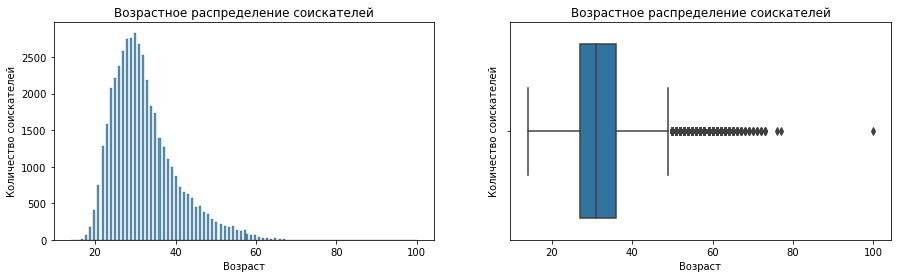

In [ ]:
fig_age, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=database_hh, x='Возраст', ax=axes[0]);
histplot.set_title('Возрастное распределение соискателей');
histplot.set_ylabel ('Количество соискателей');

boxplot = sns.boxplot(data=database_hh, x='Возраст', ax=axes[1]);
boxplot.set_title('Возрастное распределение соискателей');
boxplot.set_ylabel('Количество соискателей');

print('Мода распределения по возрасту соискателей', database_hh['Возраст'].mode())

1. Основная часть ищущих работу это люди в возрасте от 25 до 50 лет. Распределение напоминает логнормальный вид, наибольшее количество соискателей имеют возраст 30 лет (мода распределения = 30). Из коробчатой диаграммы справа видно, что имеются потенциальные выбросы для соискателей старше 70 лет. Отдельнве точки около 80 и 100 лет вероятно аномальные значения.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Мода распределения по опыту работы соискателей 0    81.0
dtype: float64


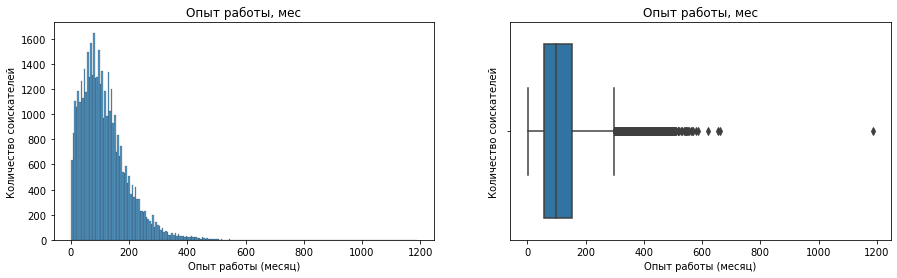

In [ ]:
fig_age, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=database_hh, x='Опыт работы (месяц)', ax=axes[0]);
histplot.set_title('Опыт работы, мес');
histplot.set_ylabel ('Количество соискателей');

boxplot = sns.boxplot(data=database_hh, x='Опыт работы (месяц)', ax=axes[1]);
boxplot.set_title('Опыт работы, мес');
boxplot.set_ylabel('Количество соискателей');

print('Мода распределения по опыту работы соискателей', database_hh['Опыт работы (месяц)'].mode())

2. Распределение по опыту работу также напоминает логнормальное. Мода распределения равна 81 месяцу. Основная часть соискателей имеют опыт работы до 300 месяцев (25 лет). 
Потенциально имется большое количество выбросов в групе соискателей с большим опытом работы. И явно аномальбное значение в районе 1200 месяцев - 100 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Мода распределения по желаемой заработной плате соискателей 0    50000.0
dtype: float64


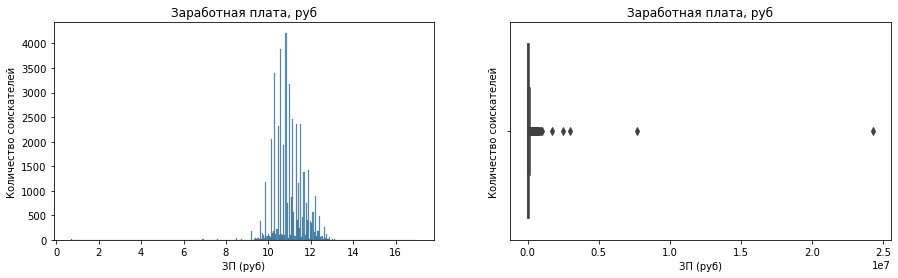

In [ ]:
fig_age, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
log_database_hh = np.log(database_hh['ЗП (руб)'] + 1)
# histplot = sns.histplot(data=database_hh, x='ЗП (руб)', ax=axes[0]);
histplot = sns.histplot(log_database_hh, ax=axes[0]); # ЗП имеет очень большой разброс значений, поэтому в логорифмическом масштабе график
histplot.set_title('Заработная плата, руб');
histplot.set_ylabel ('Количество соискателей');

boxplot = sns.boxplot(data=database_hh, x='ЗП (руб)', ax=axes[1]);
boxplot.set_title('Заработная плата, руб');
boxplot.set_ylabel('Количество соискателей');

print('Мода распределения по желаемой заработной плате соискателей', database_hh['ЗП (руб)'].mode())
# database_hh['ЗП (руб)'].quantile(1)

3. Желаемая заработная плата имеет очень большой разброс, поэтому гистограмма по оси абцисс построенна в логорифмическом масштабе. Имеется значение в районе 24 миллионов рублей, что сильно выбивается из общего объёма данных. Основная часть соискателей находится в диапазоне величины заработной платы от 25 до 160 тысяч рублей. 


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
data_zp = database_hh[database_hh['ЗП (руб)'] < 1.0e+6]
data_grouped = data_zp.groupby(['Образование'])['ЗП (руб)'].median()

labels = data_grouped.index
values = data_grouped
fig = go.Figure(data=[go.Bar(y = values, x = labels)])
fig.update_layout(
    title="Распределение желаемой зарплаты от уровня образования",
    title_x = 0.5,
    xaxis_title="Уровень образования соискателей",    
    yaxis_title="Медианная желаемая зарплата, руб",    
    margin=dict(l=50, r=0, t=30, b=0))

fig.show()

4. Соискатели с более высоким уровнем образования имеют более высокую медианную желаемую заработную плату. Так, соискатели с высшим образованием имеют в резюме в полтора раза большую заправшиваемую заработную плату, чем соискатели с со средним и среднеспециальным образованием. Уровень образования является важным признаком при прогнозировании заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
data_grouped = data_zp.groupby(['Город'])['ЗП (руб)'].median()

labels = data_grouped.index
values = data_grouped
fig = go.Figure(data=[go.Bar(y = values, x = labels)])
fig.update_layout(
    title="Зависимость желаемой зарплаты от города",
    title_x = 0.5,
    xaxis_title="Город",    
    yaxis_title="Медианная желаемая зарплата, руб",    
    margin=dict(l=50, r=0, t=30, b=0))

fig.show()

Количество соискателей с ЗП выше миллиона -  5


5. Традиционно в двух главных городах для России самые высокие запрашиваемые зарплаты, но в СпБ, всё значения медианной желаемой зарплаты в полтора раза ниже. Следующуи большие группы городов имею одинаковую медианную зраплату - 40 тысяч рублей, но скорее это последствие объединения больших групп городов захватывающие все регионы и соотвественно близкие к медиане по России. В таком делении явно выделяются "столичные" города и сливаются все остальные, хотя уровень зарплат в различных городах миллионниках всё же имеют отличия. В данном варианте, есть только три категории влияющие на прогноз - Москва, СпБ и все остальные.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
grouped_data = database_hh.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

lam_k = lambda x: 'Готовы к командировкам' if x else 'Не готовы к командировкам' # Замена логических тру и фолс на смысл признака
lam_p = lambda x: 'Готовы к переезду' if x else 'Не готовы к переезду'             # Замена логических тру и фолс на смысл признака

fig = px.bar(
    data_frame=grouped_data,
    y=grouped_data['Готовность к переезду'].apply(lam_p),
    x='ЗП (руб)',
    barmode="group",
    color=grouped_data['Готовность к командировкам'].apply(lam_k),
    title='Желаемая заработная платы от мобильности соискателей'     
)
fig.update_layout(# legend_orientation="h",
                  title=dict(x=0.5),          
                  xaxis_title="Медианная заработная плата, руб",
                  yaxis_title="Соискатели",
                  margin=dict(l=0, r=0, t=50, b=0))
fig.show()


6. Соискатели готовые к переезду и командировкам, как правило запрашивают и чуть более высокую зарплату. Так, готовность только к переезду уже повышает медианную зарплату на 10 тысяч рублей (на 20 % больше). Готовность к командировкам значительно больше повышает желаемую зарплату. У соискателей не готовых к переезду разница, готовность к командировкам повышает требуемую зарплату на 15 тысяч рублей (на 33 % больше). У соискателей готовых к переезду разрыв  в абсолютном значении имеет анологичную величину, но в процентном соотношении меньше  - 14 % (против 33 %). 
  
Объяснение такого различия вероятно связано с тем, что переезд акция относительно разовая и возможно связанная с решением паралелльного вопроса о улучшении условий в общем (больший город, лучше климат, красивее природа и т.д.). А командировки напротив вещь непредсказуемая, относительно постоянная и требует определённого ритма жизни от работника.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Город (категория городов) с максимальной зарплатой не выше миллиона -  ['другие']


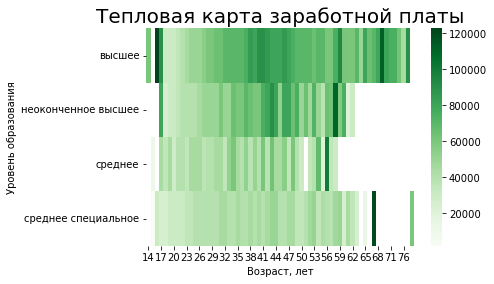

In [ ]:
pivot_database_hh = database_hh.pivot_table(
    values = 'ЗП (руб)',
    columns='Возраст',
    index='Образование',
    aggfunc = np.median
)

heatmap = sns.heatmap(data=pivot_database_hh, cmap='Greens')
heatmap.set_title('Тепловая карта заработной платы', fontsize=20);
heatmap.set_xlabel('Возраст, лет');
heatmap.set_ylabel('Уровень образования');
# pivot_database_hh

# Для задания 4.5
grouped_educ = data_zp.groupby(['Город'], as_index=False)['ЗП (руб)'].median()
fig_educ_wag = px.bar(
    data_frame=grouped_educ,
    y='Город',
    x='ЗП (руб)',
    barmode="group",      
    title='Желаемая заработная плата от города'     
)
fig_educ_wag.update_layout(
                  title=dict(x=0.5),
                  # margin=dict(l=0, r=0, t=0, b=0),
                  xaxis_title="Медианная заработная плата, руб",
                  yaxis_title="Город",
                  width=800, 
                  height=400)
fig_educ_wag.show()

# Для задания 4.5
citi = data_zp[data_zp['ЗП (руб)'] == data_zp['ЗП (руб)'].max()]["Город"].values
print('Город (категория городов) с максимальной зарплатой не выше миллиона - ', citi)


7. Для начала стоить отметить, что есть видимая связь возраста соискателей от уровня образования, чем выше образование тем старше предельные возрасты соискателей. Также видны тёмные полосы (соответсвующие бОльшим значениям) именно в группах в возрасте старше 50 лет, в зависимости от образования (и предельного возраста) эти максимумы расположены с некоторыми отличиями. Если отбросить выбросы а районе до 20 лет в группе с высшим образованием, то в диапазоне до 55 лет прослеживается нормальное распределение, старше этого возраста определённыц вывод сделать проблематично. В группах со средним и неоконченым высшим образованием распределение больше похоже на "черезполосицу". Для неоконченного высшего всё же видно чуть более высокие значения, чем у среднего образования. Соискатели со среднеспециальным образованием отличаются стабильностью незавсисимо от возраста, за исключением возможного выброса в возрасте 67 лет.

 В зависимости от города медианная желаемая заработная плата имеет значительный размах. Медлианная зарплата в Москве выше более чем в два раза по сравнению с городами милионникамии и др., в СпБ она также выше, но уже в полтора раза. Таким образом признак город является значимым.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [31]:
lam_year = lambda x: x/12 # Перевод месяцев в год
x = np.arange(0, 110, 10)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=x, mode='lines',  name='Опыт = возрасту</sup>'))
fig.add_trace(go.Scatter(x=database_hh['Возраст'], y=database_hh['Опыт работы (месяц)'].apply(lam_year), mode='markers', name='Опыт работы'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0),
                  width=1000, 
                  height=500)                  
fig.show()

# Для задания 4.1
print('Модальное значение возраста соискателей - ', database_hh['Возраст'].mode().max(), ' лет')
print('Максимальное значение возраста соискателей - ', database_hh['Возраст'].max(), ' лет')
print('Минимальное значение возраста соискателей - ', database_hh['Возраст'].min(), ' лет')
# Для задания 4.2
print('Модальное значение опыт работы в месяцах - ', database_hh['Опыт работы (месяц)'].mode().max())
print('Максимальный опыт работы в месяцах - ', database_hh['Опыт работы (месяц)'].max())
# Для задания 4.2
fig_age, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
log_database_hh = np.log(database_hh['Опыт работы (месяц)'] + 1)
histplot = sns.histplot(data=database_hh, x='Опыт работы (месяц)', ax=axes[0]);
histplot.set_title('Опыт работы в месяцах');
histplot.set_ylabel ('Количество соискателей');

boxplot = sns.boxplot(data=database_hh, x='Опыт работы (месяц)', ax=axes[1]);
boxplot.set_title('Опыт работы в месяцах');
boxplot.set_ylabel('Количество соискателей');

# Для задания 4.3 Количество соискателей с ЗП выше миллиона
zp_mil = database_hh[database_hh['ЗП (руб)'] > 1.0e+6]['ЗП (руб)'].count()
print('Количество соискателей с ЗП выше миллиона - ', zp_mil)


KeyError: 'Возраст'

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# database_hh.head()
grouped_educ_gen = data_zp.groupby(['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median()
grouped_citi_gen = data_zp.groupby(['Город', 'Пол'], as_index=False)['ЗП (руб)'].median()
fig_citi_wag = px.bar(
    data_frame=grouped_citi_gen,
    y='Город',
    x='ЗП (руб)',
    barmode="group",
    color = 'Пол',      
    title='Желаемая заработная плата от города'     
)
fig_citi_wag.update_layout(
                  title=dict(x=0.5),
                  # margin=dict(l=0, r=0, t=0, b=0),
                  xaxis_title="Медианная заработная плата, руб",
                  yaxis_title="Город",
                  width=800, 
                  height=400)
fig_citi_wag.show() 

fig_educ_gen = px.bar(
    data_frame=grouped_educ_gen,
    y='Образование',
    x='ЗП (руб)',
    barmode="group",
    color = 'Пол',      
    title='Желаемая заработная плата от города'     
)
fig_educ_gen.update_layout(
                  title=dict(x=0.5),
                  # margin=dict(l=0, r=0, t=0, b=0),
                  xaxis_title="Медианная заработная плата, руб",
                  yaxis_title="Уровень образования",
                  width=800, 
                  height=400)
fig_educ_gen.show() 
# database_hh.head()


Если расмотреть прошлую диаграмму по распределению зарплаты в городах в разрезе гендерной принадлежности. То видно в целом, что медианная зарплата у мужчин выше общей медианной. Только для города СпБ медианная зарплата совпала с медаианной для мужчин. Также заметно небольшое превышение медианной зарплаты для категории "другие" по сравнению с "миллионниками" у мужчин.

Для различного уровня образования также наблюдается более высокий уровень медианной зароботной платы у мужчин. Наибольший разрыв в абсолютном значении для высшего образования - 20 тысяч рублей и среднего в 15 тысяч рублей. Если для женщин со средним и среднеспециальным образованием медианная зарплата равна, то для мужчин со среднеспециальным образованием медианная зарплата ниже. Это вызывает недоумение - образование выше, а зарплата ниже. Хотя если сравнить данные тепловой карты, категория со средним образованием имеет самые значительные неоднородности, а категория со среднеспециальным образованием наиболее стабильная, даже в сравнении со всеми категориями (не только со средним образованием).

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
dupl_columns = list(database_hh.columns)

mask = database_hh.duplicated(subset=dupl_columns)
duplicates_hh = database_hh[mask]
print(f'Число найденных дубликатов: {duplicates_hh.shape[0]}')

hh_dedupped = database_hh.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_dedupped.shape[0]}')

Число найденных дубликатов: 161
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# «Опыт работы (месяц)»
cols_null = hh_dedupped.isnull().sum()
cols_null

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# mask_nul = hh_dedupped['Последнее/нынешнее место работы'].isnull() & hh_dedupped['Последняя/нынешняя должность'].isnull()
hh_dedupped = hh_dedupped.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'], how='all', axis=0)

# создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {'Опыт работы (месяц)': hh_dedupped['Опыт работы (месяц)'].median()}
# заполняем пропуски в соответствии с заявленным словарем
hh_dedupped = hh_dedupped.fillna(values)
expir = round(hh_dedupped['Опыт работы (месяц)'].mean())
print('Средний опыт работы, мес - ', expir)


Средний опыт работы, мес -  114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
mask_wag = (hh_dedupped['ЗП (руб)'] <= 1.0e+6) & (hh_dedupped['ЗП (руб)'] >= 1.0e+3)
database_hh_cl = hh_dedupped[mask_wag]
wag_false = hh_dedupped.shape[0] - database_hh_cl.shape[0]
print('Количество выбросов с зарплатой либо выше 1 млн. рублей, либо ниже 1 тыс. рублей - ', wag_false, 'резюме')
# database_hh_cl.shape[0]

Количество выбросов с зарплатой либо выше 1 млн. рублей, либо ниже 1 тыс. рублей -  89 резюме


44493

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
mask_age = database_hh_cl['Возраст'] >= database_hh_cl['Опыт работы (месяц)']/12
database_hh_cl = database_hh_cl[mask_age]
# database_hh_cl.shape[0]

44486

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Ассиметрия распределения 0.47
Мода распределения по возрасту соискателей 0    30
dtype: int64
Число выбросов по методу z-отклонения: 3


31137     15
32950     15
33654    100
Name: Возраст, dtype: int64

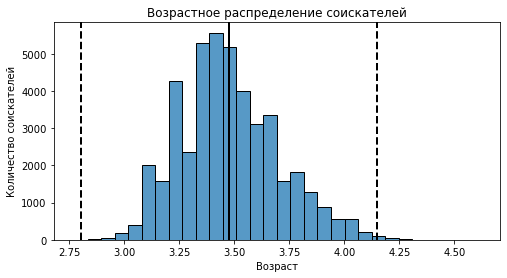

In [ ]:
log_database_hh_cl = np.log(database_hh_cl['Возраст']+1)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

histplot = sns.histplot(log_database_hh_cl, bins=30, ax=ax)
histplot.axvline(log_database_hh_cl.mean(), color='k', lw=2)
histplot.axvline(log_database_hh_cl.mean()+ 3 * log_database_hh_cl.std(), color='k', ls='--', lw=2)
histplot.axvline(log_database_hh_cl.mean()- 3 * log_database_hh_cl.std(), color='k', ls='--', lw=2)

histplot.set_title('Возрастное распределение соискателей');
histplot.set_ylabel ('Количество соискателей');

print('Ассиметрия распределения', round(log_database_hh_cl.skew(), 2))
print('Мода распределения по возрасту соискателей', database_hh_cl['Возраст'].mode())

def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    """
    ДМЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)
    Параметры left и right, которые будут задавать число сигм (стандартных отклонений) 
    влево и вправо соответственно, которые определяют границы метода z-отклонения. 
    По умолчанию оба параметры равны 3
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(database_hh_cl, 'Возраст', log_scale=True, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
outliers['Возраст']

Асимметрия распределения правосторонняя. В выбросы по возрасту попали соискатели с возрастом 15 и 100 лет.